# Interactive structures with nglview
The [pdb_prot_align.nglview_struct](https://jbloomlab.github.io/pdb_prot_align/pdb_prot_align.nglview_struct.html) module contains functions that make it easy to manipulate and visualize structures using in [nglview](https://github.com/arose/nglview).

Note that [nglview](https://github.com/arose/nglview) is designed for interactive use in a Jupyter notebook, so this example only works if run interactively.

See [here](https://jbloomlab.github.io/pdb_prot_align/installation.html) instructions on installing [nglview](https://github.com/arose/nglview).

This example shows how to color the structure of the CoV Spike using the results created by running `pdb_prot_align` in [the Spike CoV example](CoV_Spike.ipynb).
As input, specify the paths of the PDB file and the `*_sites.csv` file used in that example:

In [1]:
pdbfile = 'input_files/6crv.pdb'
sites_csv = 'output_files/beta_coronavirus_Spike_sites.csv'

First we import the necessary Python modules, which include [nglview](https://github.com/arose/nglview), [pdb_prot_align.colorschemes](https://jbloomlab.github.io/pdb_prot_align/pdb_prot_align.colorschemes) and [pdb_prot_align.nglview_struct](https://jbloomlab.github.io/pdb_prot_align/pdb_prot_align.nglview_struct.html):

In [2]:
import pandas as pd

import nglview

import pdb_prot_align

import pdb_prot_align.colorschemes
import pdb_prot_align.nglview_struct

_ColormakerRegistry()

We are going to color the structure according to the number of effective amino acids, so we get the maximum number at any site to set the color scale limits (note that it would also be reasonable to color by entropy):

In [3]:
max_neff = pd.read_csv(sites_csv)['n_effective'].max()
print(f"Max number of effective amino acids is {max_neff:.2f}")

Max number of effective amino acids is 7.50


Create a [ValueToColorMap](https://jbloomlab.github.io/pdb_prot_align/pdb_prot_align.colorschemes.html#pdb_prot_align.colorschemes.ValueToColorMap) to map the numerical values to colors:

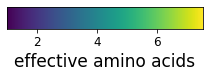

In [4]:
n_eff_color_map = pdb_prot_align.colorschemes.ValueToColorMap(
                            minvalue=1,  # min is 1 for n effective, 0 for entropy
                            maxvalue=max_neff,
                            cmap='viridis')

_ = n_eff_color_map.scale_bar(label='effective amino acids', orientation='horizontal')

Use [pdb_prot_align.nglview_struct.colorscheme_by_site](https://jbloomlab.github.io/pdb_prot_align/pdb_prot_align.nglview_struct.html#pdb_prot_align.nglview_struct.colorscheme_by_site) to register a [color scheme](https://github.com/dwhswenson/contact_map/pull/62) that colors by number of effective amino acids at each site:

In [5]:
pdb_prot_align.nglview_struct.colorscheme_by_site(
                               'n_effective_by_site',
                                sites_df=sites_csv,
                                color_by=('n_effective', n_eff_color_map))

Now create a structure widget that shows a cartoon colored by site.
Note that to do this, we first clear all representations.
We then add a cartoon representation using the color scheme we have just created.
Finally, we set to the desired orientation.
To get that orientation, manually rotate and then call `view._camera_orientation`.
(Note that `view.zoom()` is also useful):

In [6]:
view = nglview.show_structure_file(pdbfile,
                                   default_representation=False)
view.clear_representations()
view.add_cartoon(color='n_effective_by_site', selection='protein')
#view.center()

# desired orientation, obtained by manually orienting and then calling
# `view._camera_orientation`
desired_orientation = [195, 37, 110, 0,
                       -116, 37, 193, 0,
                       14, -222, 50, 0,
                       -154, -161, -176, 1]
view.control.orient(desired_orientation)

view

NGLWidget()

Do the same, but show a space-filling representation and color by site entropy instead.
First, make the color-mapping:

Max entropy is 2.91


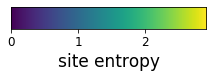

In [7]:
max_ent = pd.read_csv(sites_csv)['entropy'].max()
print(f"Max entropy is {max_ent:.2f}")

ent_color_map = pdb_prot_align.colorschemes.ValueToColorMap(
                            minvalue=0,
                            maxvalue=max_ent,
                            cmap='viridis')

_ = ent_color_map.scale_bar(label='site entropy', orientation='horizontal')

Register the color scheme and add to the widget.
Here we color just one of the monomers by site entropy, and show the others in gray (see [here](https://github.com/arose/ngl/blob/master/doc/usage/selection-language.md) for more information on the selection syntax used below):

In [8]:
pdb_prot_align.nglview_struct.colorscheme_by_site(
                               'entropy_by_site',
                                sites_df=sites_csv,
                                color_by=('entropy', ent_color_map))
view2 = nglview.show_structure_file(pdbfile,
                                    default_representation=False)
view2.clear_representations()
view2.add_spacefill(color='gray', selection='protein')
view2.add_spacefill(color='entropy_by_site', selection='protein and :A')
view2.control.orient(desired_orientation)

view2

NGLWidget()